# Contents:



*   [About Data](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)

*   [EDA](#eda)

*   [Conclusion](#conc)




# Libraries:

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, ks_2samp, pearsonr, yeojohnson

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data:

In [293]:
#!unzip "/content/drive/MyDrive/Absenteeism_at_work_AAA.zip" -d "/content/drive/MyDrive/Absenteeism_at_work_AAA/"

In [294]:
df = pd.read_csv("/content/drive/MyDrive/Absenteeism_at_work_AAA/Absenteeism_at_work.csv", sep = ';')

In [295]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [296]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [298]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [299]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


<a id='eda'></a>
# Data Preprocessing and EDA:


* Re-encode some categorical features like: Month of absence, Day of week etc for better working with data.

In [300]:
df['Education'].unique()

array([1, 3, 2, 4])

In [301]:
# make copy of data
df_c = df.copy()

In [302]:
# month
month_mapping = {0: 'Unknown', 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Day of week
day_mapping = {2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# seasons
season_mapping = {1: 'Summer', 2: 'Autumn', 3: 'Winter', 4: 'Spring'}

# education
education_mapping = {1: 'High School', 2: 'Graduate', 3: 'Post-Graduate', 4: 'Master_PHD'}

# yes/No
ys_no_mapping = {1: 'Yes', 0: 'No'}


In [303]:
# apply to data
df_c['Month of absence'] = df_c['Month of absence'].apply(lambda x: month_mapping[x])
df_c['Day of the week'] = df_c['Day of the week'].apply(lambda x: day_mapping[x])
df_c['Seasons'] = df_c['Seasons'].apply(lambda x: season_mapping[x])
df_c['Education'] = df_c['Education'].apply(lambda x: education_mapping[x])
df_c['Social drinker'] = df_c['Social drinker'].apply(lambda x: ys_no_mapping[x])
df_c['Social smoker'] = df_c['Social smoker'].apply(lambda x: ys_no_mapping[x])
df_c['Disciplinary failure'] = df_c['Disciplinary failure'].apply(lambda x: ys_no_mapping[x])

In [304]:
df_c.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,July,Tuesday,Summer,289,36,13,33,239.554,...,No,High School,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Summer,118,13,18,50,239.554,...,Yes,High School,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Summer,179,51,18,38,239.554,...,No,High School,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Summer,279,5,14,39,239.554,...,No,High School,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Summer,289,36,13,33,239.554,...,No,High School,2,Yes,No,1,90,172,30,2


In [305]:
df_c.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Summer,Summer,Summer,Summer,Summer
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


**for Reason of absence feature: we have from 0 to 28 reasons, with 1: 21 represernt ICD encodings for disease, 22: 28 are some medical-related reasons but not a disease and 0 is _unkown_ reason.**

In [306]:
# make new column to distinguish between medical-related reasons and unkown reasons.
def in_icd(x):
  return 'Yes' if x >=1 and x <= 21 else 'No'
df_c['disease'] = df_c['Reason for absence'].apply(in_icd)
#check
df_c.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Summer,Summer,Summer,Summer,Summer
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


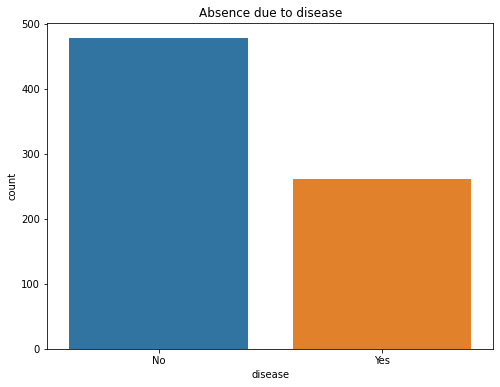

In [307]:
plt.figure(figsize=(8, 6))
sns.countplot(df_c.disease)
plt.title("Absence due to disease");

In [308]:
df_c.disease.value_counts(normalize = True)

No     0.645946
Yes    0.354054
Name: disease, dtype: float64

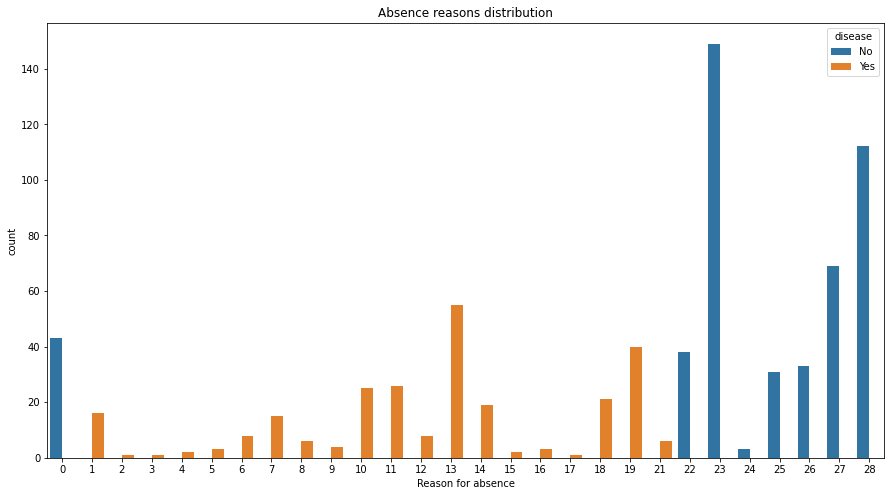

In [309]:
plt.figure(figsize= (15, 8))
sns.countplot(df_c['Reason for absence'], hue = df_c.disease)
plt.title("Absence reasons distribution");

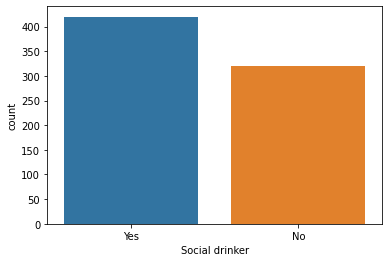

In [310]:
sns.countplot(df_c['Social drinker']);

In [311]:
df_c['Social drinker'].value_counts(normalize = True)

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64

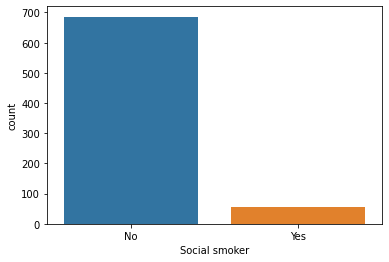

In [312]:
sns.countplot(df_c['Social smoker']);

In [313]:
df_c['Social smoker'].value_counts(normalize = True)

No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64

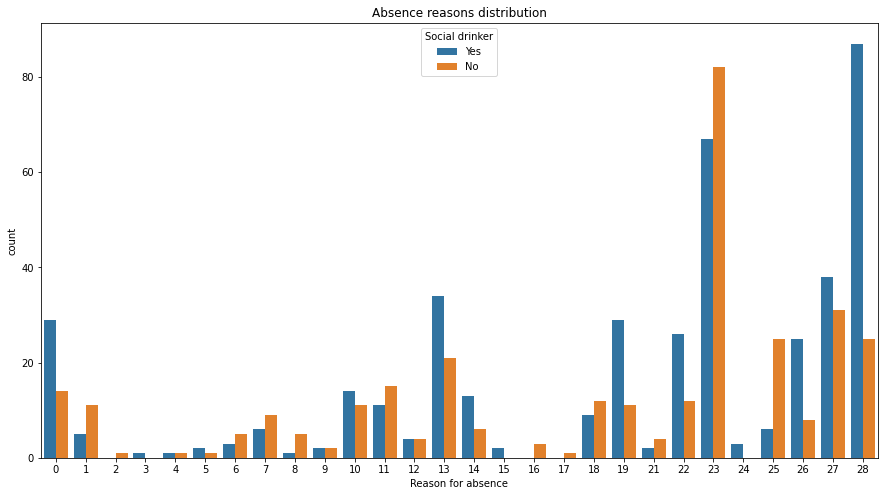

In [314]:
plt.figure(figsize= (15, 8))
sns.countplot('Reason for absence', data = df_c, hue = 'Social drinker')
plt.title("Absence reasons distribution");

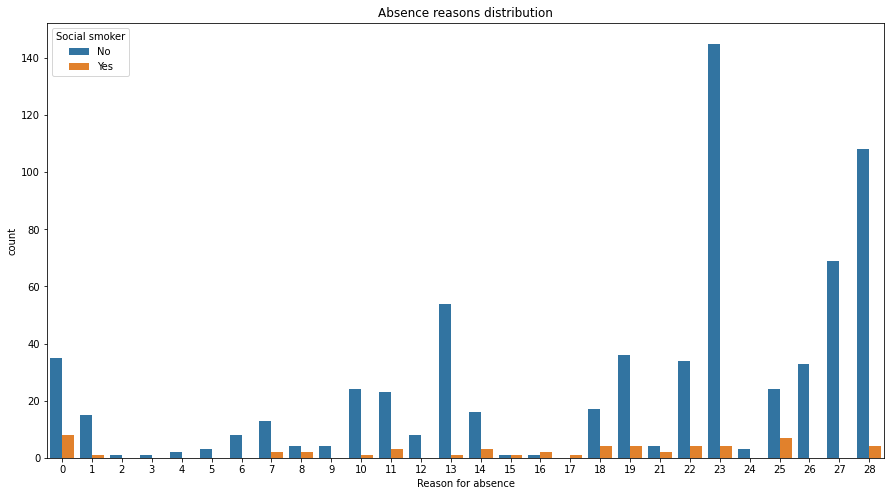

In [315]:
plt.figure(figsize= (15, 8))
sns.countplot('Reason for absence', data = df_c, hue = 'Social smoker')
plt.title("Absence reasons distribution");

## Conditional Probability:

In [316]:
drinker_prob = df_c['Social drinker'].value_counts(normalize = True)['Yes']
drinker_prob

0.5675675675675675

In [317]:
smoker_prob = df_c['Social smoker'].value_counts(normalize = True)['Yes']
smoker_prob

0.07297297297297298

In [318]:
#create mask for social drinkers/smokers 
drinker_mask = df_c["Social drinker"] == "Yes"
smoker_mask = df_c["Social smoker"] == "Yes"

In [319]:
total_entries = df_c.shape[0]
absence_drinker_prob = df_c["Reason for absence"][drinker_mask].value_counts()/total_entries
absence_smoker_prob = df_c["Reason for absence"][smoker_mask].value_counts()/total_entries

In [320]:
# compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob\
                                           /drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob\
                                          /smoker_prob

<Figure size 432x288 with 0 Axes>

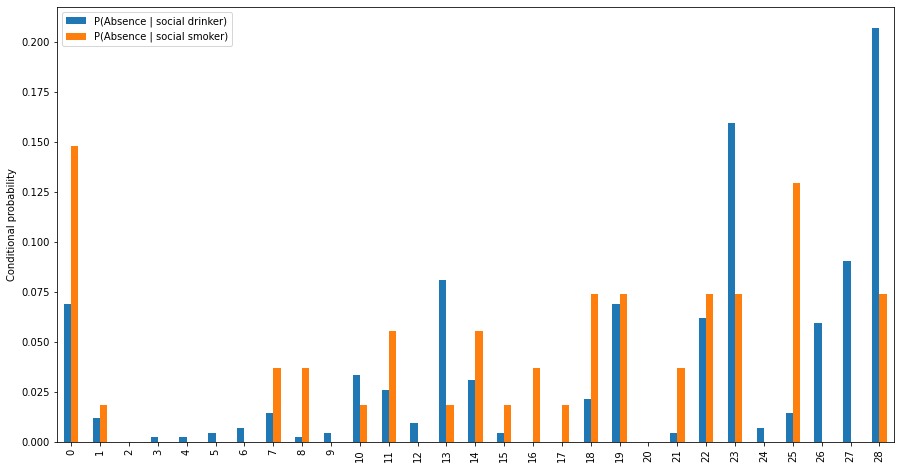

In [321]:
# plot probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(15,8))
ax.set_ylabel("Conditional probability");

**compute probability of being smoker/drinker given absence reason**

In [322]:
absence_prob = df_c["Reason for absence"].value_counts(normalize=True)
absence_prob

23    0.201351
28    0.151351
27    0.093243
13    0.074324
0     0.058108
19    0.054054
22    0.051351
26    0.044595
25    0.041892
11    0.035135
10    0.033784
18    0.028378
14    0.025676
1     0.021622
7     0.020270
6     0.010811
12    0.010811
21    0.008108
8     0.008108
9     0.005405
5     0.004054
16    0.004054
24    0.004054
15    0.002703
4     0.002703
3     0.001351
2     0.001351
17    0.001351
Name: Reason for absence, dtype: float64

In [323]:
# compute conditional probabilities for drinker/smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker["P(social drinker | Absence)"] = cond_prob["P(Absence | social drinker)"]*drinker_prob/absence_prob
cond_prob_drinker_smoker["P(social smoker | Absence)"] = cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob


<Figure size 432x288 with 0 Axes>

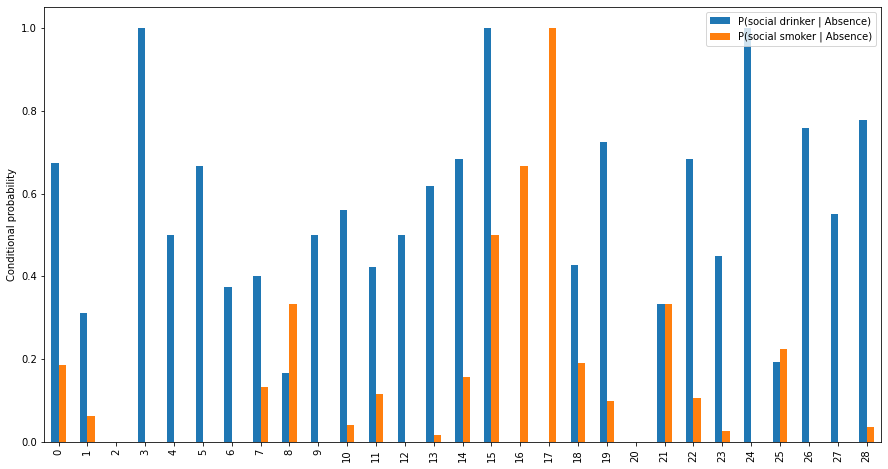

In [324]:
plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(15,8))
ax.set_ylabel("Conditional probability");

## Relation between being drinker/smoker and absence hours

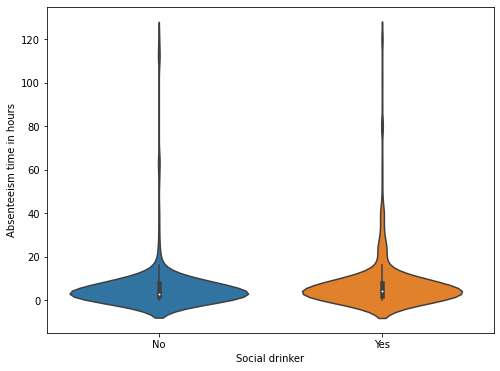

In [325]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", 
               data=df_c, order=["No", "Yes"]);

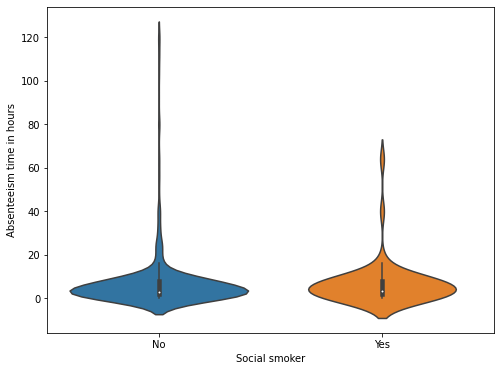

In [326]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours", 
               data=df_c, order=["No", "Yes"]);

In [327]:
hours_col = "Absenteeism time in hours"
# test mean absenteeism time for drinkers
drinkers_mask = df_c["Social drinker"] == "Yes"
hours_drinkers = df_c.loc[drinker_mask, hours_col]
hours_non_drinkers = df_c.loc[~drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, p-value: {drinkers_test[1]}")

Statistic value: 1.7713833295243993, p-value: 0.07690961828294651


In [328]:
# test mean absenteeism time for smokers
smokers_mask = df_c["Social smoker"] == "Yes"
hours_smokers = df_c.loc[smokers_mask, hours_col]
hours_non_smokers = df_c.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, p-value: {smokers_test[1]}")

Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


In [329]:
# test the distribution:
ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)
print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison:  statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison:  statistics=0.104, pvalue=0.607


## Analysing BMI:

In [330]:
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    else:
        category = "obese"
    return category
# compute BMI category
df_c["BMI category"] = df_c["Body mass index"].apply(get_bmi_category)

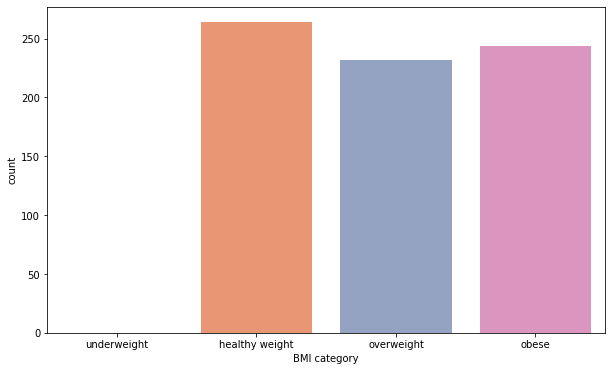

In [331]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_c, x='BMI category', \
              order=["underweight", "healthy weight", \
                     "overweight", "obese"], \
              palette="Set2");

In [ ]:
# plot BMI categories vs Reason for absence
plt.figure(figsize=(16, 10))
ax = sns.countplot(data=df_c, 
                   x="Reason for absence", hue="BMI category",
                   hue_order=["underweight", "healthy weight",
                              "overweight", "obese"], 
                   palette="Set2")
ax.set_xlabel("Number of employees");

## Age Analysis:

In [ ]:
#correlation between Age and Absence hours

pearson_test = pearsonr(df_c['Age'], df_c['Absenteeism time in hours'])
pearson_test

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="Age", y="Absenteeism time in hours", \
                 data=df_c, scatter_kws={"alpha":0.1})
ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}");

In [ ]:
# Impact of Age on reason for absence
plt.figure(figsize=(8,6))
sns.violinplot(x="disease", y="Age", data=df_c);

In [ ]:
disease_mask = df_c.disease == 'Yes'
disease_ages = df_c.Age[disease_mask]
no_disease_ages = df_c.Age[~disease_mask]


In [ ]:
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

In [ ]:
# test equality of distributions via Kolmogorov-Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

In [ ]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", 
               data=df_c)

## Education Analysis:

In [ ]:
df_c['Education'].value_counts(normalize = True)

In [ ]:
# distribution of absence hours, based on education level
plt.figure(figsize=(8,6))
sns.violinplot(x="Education", y="Absenteeism time in hours",
               data=df_c
               );

In [ ]:
# compute mean and standard deviation of absence hours
education_types = ['High School', 'Post-Graduate', 'Graduate', 'Master_PHD']
for educ_type in education_types:
    mask = df_c["Education"] == educ_type
    hours = df_c["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Education type: {educ_type:12s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

In [ ]:
# plot reason for absence, based on education level
plt.figure(figsize=(16, 10))
sns.countplot(data=df_c, x="Reason for absence",
              hue="Education");

## Distance from Residence to Work Analysis:

In [ ]:
sns.jointplot(x="Distance from Residence to Work", 
              y="Absenteeism time in hours", 
              data=df_c, kind="reg");

In [ ]:
# apply transformation to Absenteeism time in hours
hours = yeojohnson(df_c["Absenteeism time in hours"].apply(float))
distances = df_c["Distance from Residence to Work"]

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work",
                   "Transformed absenteeism time in hours");

## Transportation expense Analysis:

In [ ]:
sns.jointplot(x="Transportation expense", 
              y="Absenteeism time in hours", 
              data=df_c, kind="reg");

In [ ]:
expenses = df_c["Transportation expense"]

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", 
                   "Transformed absenteeism time in hours");

In [ ]:
expenses_corr = pearsonr(hours[0], expenses)
expenses_corr

## Temporal Factors Analysis:

In [ ]:
# count entries per day of the week and month
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df_c, 
                   x='Day of the week', 
                   order=["Monday", "Tuesday", 
                          "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df_c, 
                   x='Month of absence', \
                   order=["January", "February", "March", 
                          "April", "May", "June", "July", 
                          "August", "September", "October", 
                          "November", "December", "Unknown"])
ax.set_title("Number of absences per month");

In [ ]:
# analyze average distribution of absence hours 
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week", 
               y="Absenteeism time in hours",
               data=df_c, 
               order=["Monday", "Tuesday", 
                      "Wednesday", "Thursday", "Friday"]);

In [ ]:
plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence", 
               y="Absenteeism time in hours",
               data=df_c, 
               order=["January", "February", 
                      "March", "April", "May", "June", "July",
                      "August", "September", "October", 
                      "November", "December", "Unknown"]);

In [ ]:
dows = ["Monday", "Tuesday", "Wednesday", 
        "Thursday", "Friday"]
for dow in dows:
    mask = df_c["Day of the week"] == dow
    hours = df_c["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {dow:10s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

In [ ]:
months = ["January", "February", "March", "April", "May", 
          "June", "July", "August", "September", "October", 
          "November", "December"]
for month in months:
    mask = df_c["Month of absence"] == month
    hours = df_c["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} | Stddev: {stddev:8.03f}")

In [ ]:
# perform statistical test for avg duration diference
thursday_mask = df_c["Day of the week"] == "Thursday"
july_mask = df_c["Month of absence"] == "July"
thursday_data = df_c["Absenteeism time in hours"][thursday_mask]
no_thursday_data = df_c["Absenteeism time in hours"][~thursday_mask]
july_data = df_c["Absenteeism time in hours"][july_mask]
no_july_data = df_c["Absenteeism time in hours"][~july_mask]
thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)
print(f"Thursday test result: statistic={thursday_res[0]:.3f}, pvalue={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, pvalue={july_res[1]:.3f}")

<a id='conc'></a>
# Conclusion:


*   About 35% of absence reasons are because of having a disease.
*   For Non Disease: Most of reasons are having a medical consultation then dental consultation then physiotherapy.
*   For Disease: _Diseases of the musculoskeletal system and connective tissue_ and  _Injury, poisoning and certain other consequences of external causes_ are the top two reasons for absence.
*   For Drinkers: We see a significant difference for medical consultation as a reason for absence.
*   For Smokers: we have only 7% of them on data, makes it hard to notice association between being smokers and absence reasons.
*   From conditional probability: we see the highest reason for absence for drinkers is dental consultation followed by medical consultation.
*   From conditional probability: we see that smokers mostly absent for unkown reasons and some laboratory examinations.
*   Average Absenteeism hours have no significant difference between smokers/drinkers and non smokers/drinkers.
*   The distribution of absenteeism hours for drinkers differs from of non drinkers.
*   More than half of absenteeism times (about 60 % ) is for over weighted and obese employees.
*   There is no significant difference between the distributions between disease related reason and non disease related reasons on different ages == That means Age has no impact on employees' absenteeism.
*   Employees with higher education level tend to have shorter absences. 
*   We have slight positive correlation between expenses and absence hours.
*   Average duration of absences is shorter in thursday compared with other days.
*   Absences during july have the longest average duration among other months.













